In [2]:
import boto3
import csv
import re
import os
region='us-east-1'
with open("shar_accessKeys.csv","r") as input:
    next(input)
    reader=csv.reader(input)
    for line in reader:
        accesskey=line[0]
        secretkey=line[1]
photo='dataset/korf1.jpg'
client=boto3.client('rekognition',aws_access_key_id=accesskey,aws_secret_access_key=secretkey,region_name=region)
#client=boto3.client('rekognition')

In [5]:
from PIL import Image, ImageEnhance
basepath = 'C:/Users/sshar/testingbias/dataset/'
import csv
listofcsb=[]
listfcsb=[]
listmcsb=[]
y=-1
j=-1
cor=-1
genlist=[]
with open("verify.csv","r") as input:
    next(input)
    reader=csv.reader(input)
    for line in reader:
        gen=line[0]
        genlist.append(gen)
print(genlist[0])
for en in os.listdir(basepath):
    x = re.search(".*jpg", en)
    if(x):
        #y=os.path.join(basepath,entry)
        z=os.path.join(basepath,en)
        #im = Image.open(z)
        j=j+1
        i=-1
        
        listofbris=[]
        #enhancer = ImageEnhance.Brightness(im)
        dict={}
        
        
        numbers1=[0.5,1.0,5.0,10,20.0,40,60,100,200]
        numbers2=[0.5,1.0,5.0,10,20.0,40,60,100,200]
        for x in numbers1:
            im = Image.open(z)
            enhancer = ImageEnhance.Sharpness(im)
            i=i+1
            
            im_output = enhancer.enhance(x)
            im_output.save('change11.png')
           
            for y in numbers2:
                
                
                
                im = Image.open('change11.png')
                enhancer = ImageEnhance.Contrast(im)
                im_output = enhancer.enhance(y)
                im_output.save('gaus11.png')
               
                dict={}
                l1=[]
                factorset=[]
                factorset.append(x)
                factorset.append(y)
                
                tup1=tuple(factorset)

               
                with open('gaus11.png', "rb") as source_image:
                    image=source_image.read()
                    response=client.detect_faces(Image={'Bytes':image}, Attributes=['ALL'])

                    value=response.get('FaceDetails')
                
                    if value:
                        v=value[0]

                        k=v.get('Gender')
                        if k['Value']==genlist[j]:
                                l1.append('0')
                        else:

                            l1.append('1')

                        l1.append(k['Confidence'])
                

                    dict[tup1]=l1
                                                    


                listofbris.append(dict)
            if genlist[j]=='Female':
               
                listfcsb.append(listofbris)
            else:
                
                listmcsb.append(listofbris)                                        

            listofcsb.append(listofbris)


Male


In [ ]:
i=0
for q in listmcsb:
    i=i+1
    print(q)

In [48]:
for li in listmcsb:
    for li2 in li:
        for dictionkey,dictionval in li2.items():
            if dictionval:
                if dictionval[0]=='1':
                    dictionval[1]=100-dictionval[1]

In [49]:
import plotly.graph_objects as go
import numpy as np
from collections.abc import Mapping
import matplotlib.pyplot as plt
from mpl_toolkits import mplot3d
#fig = plt.figure()
l1=[]
l2=[]
l3=[]

for li in listmcsb:
    for li2 in li:
        for dictionkey,dictionval in li2.items():
            if dictionval:
                l1.append(dictionkey[0])
                l2.append(dictionkey[1])
                l3.append(dictionval[1])
                        
fig = go.Figure(data=[go.Mesh3d(x=l1,
                   y=l2,
                   z=l3,
                   opacity=0.5,
                   color='rgba(244,22,100,0.6)'
                  )])


fig.write_html('3dplots/sc.html', auto_open=True)
    

In [55]:
#sharpness contrast
import plotly.graph_objects as go
import numpy as np
from collections.abc import Mapping
import matplotlib.pyplot as plt
from mpl_toolkits import mplot3d
color=['b','g','r','c','m','y','navy','purple','teal','lightpink','lime','dimgray','gold','plum','violet','aqua']
#fig = plt.figure()
l1=[]
l2=[]
l3=[]
i=-1
fig = go.Figure(data=[go.Scatter3d(x=l1,
                   y=l2,
                   z=l3,
                   opacity=0.5
                  )])

for li in listmcsb:
    l1=[]
    l2=[]
    l3=[]
    i=i+1
    for li2 in li:
        for dictionkey,dictionval in li2.items():
                l1.append(dictionkey[0])
                l2.append(dictionkey[1])
                for x in dictionval:
                    if int(x)>1:
                        
                        l3.append(x)

    fig.add_trace(go.Scatter3d(x=l1,
                   y=l2,
                   z=l3,
                   opacity=0.5
                 
                  ))


fig.write_html('3dplots/sc.html', auto_open=True)

In [54]:
import plotly.graph_objects as go
import numpy as np
from collections.abc import Mapping
import matplotlib.pyplot as plt
from mpl_toolkits import mplot3d
#fig = plt.figure()
l1=[]
l2=[]
l3=[]

for li in listmcsb:
    for li2 in li:
        for dictionkey,dictionval in li2.items():
                l1.append(dictionkey[0])
                l2.append(dictionkey[1])
               
                for x in dictionval:
                    if int(x)>1:
                        
                        l3.append(x)                        
fig = go.Figure(data=[go.Mesh3d(x=l1, y=l2, z=l3,  opacity=0.50)])
fig.write_html('3dplots/sc1.html', auto_open=True)

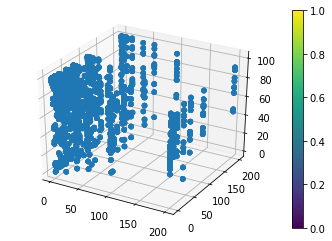

In [53]:
from collections.abc import Mapping
import matplotlib.pyplot as plt
from mpl_toolkits import mplot3d
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
l1=[]
l2=[]
l3=[]
l4=[]
ax = plt.axes(projection='3d')
for li in listmcsb:
    for li2 in li:
        for dictionkey,dictionval in li2.items():
            if dictionval:
                l1.append(dictionkey[0])
                l2.append(dictionkey[1])

                l4.append(dictionval[1])


#ax.scatter3D(l1, l2, l3, 'gray')
#ax.plot(l1, l2, l3, 'gray')
img = ax.scatter(l1, l2, l4,'gray')
fig.colorbar(img)
plt.show()

In [56]:
for li in listfcsb:
    for li2 in li:
        for dictionkey,dictionval in li2.items():
            if dictionval:
                if dictionval[0]=='1':
                    dictionval[1]=100-dictionval[1]

In [57]:
import plotly.graph_objects as go
import numpy as np
from collections.abc import Mapping
import matplotlib.pyplot as plt
from mpl_toolkits import mplot3d
color=['b','g','r','c','m','y','navy','purple','teal','lightpink','lime','dimgray','gold','plum','violet','aqua']
#fig = plt.figure()
l1=[]
l2=[]
l3=[]
i=-1
fig = go.Figure(data=[go.Scatter3d(x=l1,
                   y=l2,
                   z=l3,
                   opacity=0.5
                  )])

for li in listfcsb:
    l1=[]
    l2=[]
    l3=[]
    i=i+1
    for li2 in li:
        for dictionkey,dictionval in li2.items():
                l1.append(dictionkey[0])
                l2.append(dictionkey[1])
                for x in dictionval:
                    if int(x)>1:
                        
                        l3.append(x)

    fig.add_trace(go.Scatter3d(x=l1,
                   y=l2,
                   z=l3,
                   opacity=0.5
                 
                  ))


fig.write_html('3dplots/fsc.html', auto_open=True)

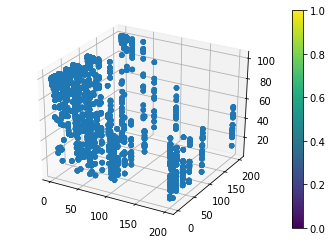

In [59]:
from collections.abc import Mapping
import matplotlib.pyplot as plt
from mpl_toolkits import mplot3d
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
l1=[]
l2=[]
l3=[]
l4=[]
ax = plt.axes(projection='3d')
for li in listfcsb:
    for li2 in li:
        for dictionkey,dictionval in li2.items():
            if dictionval:
                l1.append(dictionkey[0])
                l2.append(dictionkey[1])

                l4.append(dictionval[1])


#ax.scatter3D(l1, l2, l3, 'gray')
#ax.plot(l1, l2, l3, 'gray')
img = ax.scatter(l1, l2, l4,'gray')
fig.colorbar(img)
plt.show()

In [60]:
from collections.abc import Mapping
import matplotlib.pyplot as plt
from mpl_toolkits import mplot3d

l1=[]
l2=[]

l4=[]

for li in listmcsb:
    for li2 in li:
        for dictionkey,dictionval in li2.items():
            if dictionval:
                l1.append(dictionkey[0])
                l2.append(dictionkey[1])
            
                l4.append(dictionval[1])
fig = go.Figure(data=[go.Mesh3d(x=l1, y=l2, z=l4, color='lightpink', opacity=0.50)])
fig.write_html('3dplots/mscsurface.html', auto_open=True)

In [61]:
from collections.abc import Mapping
import matplotlib.pyplot as plt
from mpl_toolkits import mplot3d

l1=[]
l2=[]

l4=[]

for li in listfcsb:
    for li2 in li:
        for dictionkey,dictionval in li2.items():
            if dictionval:
                l1.append(dictionkey[0])
                l2.append(dictionkey[1])
            
                l4.append(dictionval[1])
fig = go.Figure(data=[go.Mesh3d(x=l1, y=l2, z=l4, color='lightpink', opacity=0.50)])
fig.write_html('3dplots/fscsurface.html', auto_open=True)